In [1]:
import numpy as np
import os
import pandas as pd
import gc
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, KFold, train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
import random
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pastENEM = 'Enem/DataSet/Data/'
pastENADE = 'Enade/DataSet/Data/'
pastVar = 'Enade/DataSet/Dicionarios/Variaveis/'

In [3]:
dff_Enade = {}
dff_Enem = {}

In [4]:
ano_inicio = 2009
ano_fim = 2011

for ano in range(ano_inicio, ano_fim + 1):
    temp = pd.DataFrame()
    for chunk in pd.read_csv(pastENEM + 'MICRODADOS_ENEM_' + str(ano) + '.csv', encoding = 'Latin1', 
                             delimiter = ';', chunksize=300000,  low_memory = False):
        temp = pd.concat([temp, chunk], ignore_index=True)
        temp = temp.dropna()
        
        #temp['CO_UF'] = temp['COD_MUN_RESID'].apply(str).str.slice(0,2)
        #temp.to_csv(pastENEM + '/MICRODADOS_ENEM_' + str(ano) + '.csv', index = False, sep = ';', encoding = 'Latin1')
        del chunk; gc.collect()
    temp = temp.drop(columns=['NU_IDADE'])
    dff_Enem.update({ano: temp})
    del temp; gc.collect()
    print(str(ano) + ' Terminado')

2009 Terminado
2010 Terminado
2011 Terminado


In [5]:
ano_inicio = 2012
ano_fim = 2014

for ano in range(ano_inicio, ano_fim + 1):
    temp = pd.DataFrame()
    for chunk in pd.read_csv(pastENEM + 'MICRODADOS_ENEM_' + str(ano) + '.csv', encoding = 'Latin1', 
                             delimiter = ';', chunksize=300000,  low_memory = False):
        temp = pd.concat([temp, chunk], ignore_index=True)
        temp = temp.dropna()
        
        #temp['CO_UF'] = temp['COD_MUN_RESID'].apply(str).str.slice(0,2)
        #temp.to_csv(pastENEM + '/MICRODADOS_ENEM_' + str(ano) + '.csv', index = False, sep = ';', encoding = 'Latin1')
        del chunk; gc.collect()
    temp = temp.drop(columns=['IDADE'])
    dff_Enem.update({ano: temp})
    del temp; gc.collect()
    print(str(ano) + ' Terminado')

2012 Terminado
2013 Terminado
2014 Terminado


In [6]:
ano_inicio = 2015
ano_fim = 2019

for ano in range(ano_inicio, ano_fim + 1):
    temp = pd.DataFrame()
    for chunk in pd.read_csv(pastENEM + 'MICRODADOS_ENEM_' + str(ano) + '.csv', encoding = 'Latin1', 
                             delimiter = ';', chunksize=300000,  low_memory = False):
        temp = pd.concat([temp, chunk], ignore_index=True)
        temp = temp.dropna()
        
        #temp['CO_UF'] = temp['COD_MUN_RESID'].apply(str).str.slice(0,2)
        #temp.to_csv(pastENEM + '/MICRODADOS_ENEM_' + str(ano) + '.csv', index = False, sep = ';', encoding = 'Latin1')
        del chunk; gc.collect()
    temp = temp.drop(columns=['NU_IDADE'])
    dff_Enem.update({ano: temp})
    del temp; gc.collect()
    print(str(ano) + ' Terminado')

2015 Terminado
2016 Terminado
2017 Terminado
2018 Terminado
2019 Terminado


In [52]:
ano_inicio = 2009
ano_fim = 2019

amostras = 10000

df = []
coln = ['COD_MUN_RESID', 'OB_NT_C1', 'OB_NT_C2','OB_NT_C3', 'OB_NT_C4',
        'RD_NT_C1', 'RD_NT_C2', 'RD_NT_C3', 'RD_NT_C4', 'RD_NT_C5']

colr = ['OB_NT_C1', 'OB_NT_C2', 'OB_NT_C3' ,'OB_NT_C4', 'RD_NT_C1',
       'RD_NT_C2', 'RD_NT_C3', 'RD_NT_C4', 'RD_NT_C5', 'NU_ANO', 'RAZAO']

colpr = ['OB_NT_C1', 'OB_NT_C2', 'OB_NT_C3' ,'OB_NT_C4', 'RD_NT_C1', 'RD_NT_C2', 'RD_NT_C3', 
         'RD_NT_C4', 'RD_NT_C5']

for ano in range(ano_inicio, ano_fim + 1):
   
    temp = pd.DataFrame()
    temp = dff_Enem[ano].copy()
    ran = np.random.randint(0,temp.shape[0], amostras)
    temp = temp.reset_index(drop = True)
    temp = temp.loc[ran]
    
    temp = temp.reset_index(drop = True)
    col = temp.columns.values
    temp = temp[col]
    temp = temp.rename(columns={col[i] : coln[i] for i in range(0,len(coln))}, inplace = False)
    
    
    for j in colpr:
        temp[j] = pd.to_numeric(temp[j], errors='coerce')
    
    media_global = temp[colpr].mean().sum()
    media_individual = temp[colpr].sum(axis = 1)
    
    #temp['CO_UF'] = temp['COD_MUN_RESID'].apply(str).str.slice(0,2)
    temp['ANO'] = [ano]*temp.shape[0]
    temp['RAZAO'] = media_individual/media_global
    
    #print(temp[colr].columns.values)
    df.append(temp[colr])
    print(ano)

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [240]:
media = []
for ano in range(ano_inicio, ano_fim + 1):
    temp = pd.DataFrame()
    temp = dff_Enem[ano].copy()
    temp = temp.reset_index(drop = True)
    col = temp.columns.values
    temp = temp[col]
    temp = temp.rename(columns={col[i] : coln[i] for i in range(0,len(coln))}, inplace = False)
    for j in colpr:
        temp[j] = pd.to_numeric(temp[j], errors='coerce')
    
    media_global = temp[colpr].mean().mean()
    media.append(media_global)
    print(ano)

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [220]:
df2 = df.copy()

colnor = ['OB_NT_C1', 'OB_NT_C2','OB_NT_C3', 'OB_NT_C4', 'RD_NT_C1', 
          'RD_NT_C2', 'RD_NT_C3', 'RD_NT_C4', 'RD_NT_C5', 'RAZAO']
for ano in range(0,11):
    t = df2[ano].copy()
    for i in colnor:
        t[i] = (t[i] - t[i].min())/(t[i].max() - t[i].min())
    t = t.dropna()
    t = t.reset_index(drop = True)
    df2[ano] = t

df3  = pd.concat(df2, ignore_index=True)

df3 = df3.dropna()
df3 = df3.reset_index(drop = True)


In [221]:
#x = pd.get_dummies(df3['CO_UF'])
X = df3.drop(columns = ['RAZAO'], axis = 1)
#X =  pd.concat([x, X], axis = 1)
X = X.values
y = df3['RAZAO'].values
#label = X.columns()

In [222]:
norm = 'true'
n = 10
rs = 0
kf = KFold(n_splits=n)
r = []


In [223]:
result = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    result.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r.append(sum(result)/len(result))

In [224]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    result.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r.append(sum(result)/len(result))

In [225]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    result.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    imp = reg.feature_importances_
r.append(sum(result)/len(result))

In [226]:
no_inicio = 2009
ano_fim = 2019

q_provas = []
for ano in range(no_inicio, ano_fim + 1):
    q_provas.append(dff_Enem[ano].shape[0])
    print(dff_Enem[ano].shape[0])

2425600
3164852
300000
5791065
5007734
5947748
5604850
5818376
4426675
3893671
3701947


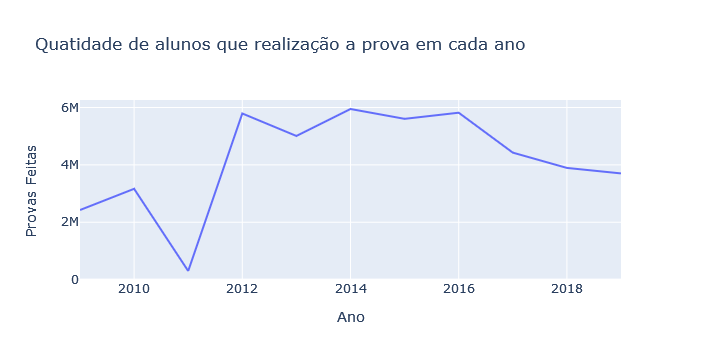

In [227]:


dd = pd.DataFrame(np.array([range(no_inicio, ano_fim+1), q_provas]).T, columns = ['Ano', 'Provas Feitas'])


fig = px.line(dd, x = 'Ano', y = 'Provas Feitas', 
             title = 'Quatidade de alunos que realização a prova em cada ano')
fig.show()

fig.write_image("importancia.jpeg")
#plt.plot(ano_enem, q_provas)
#plt.title("Quatidade de alunos que realização a prova em cada ano")
#plt.xlabel('Ano')
#plt.ylabel('Quatidade de aluno que fizeram a prova')
#plt.savefig('PrecisaoSensibilidade.jpg')
#plt.show()


In [228]:
classificadores = ['Random Forest', 'MLP', 'Regressão Linear']
rr = pd.DataFrame(np.array([classificadores, r]).T,  columns = ['Classificadores', 'EQM'])

print(rr.to_latex(index = False))

\begin{tabular}{ll}
\toprule
 Classificadores &                 EQM \\
\midrule
   Random Forest & 0.06853537534150705 \\
             MLP & 0.24689756350827613 \\
Regressão Linear & 0.20068873860926548 \\
\bottomrule
\end{tabular}



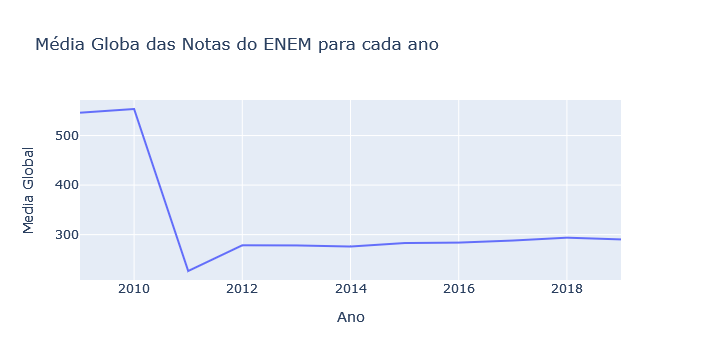

In [241]:
dd = pd.DataFrame(np.array([range(no_inicio, ano_fim+1), media]).T, columns = ['Ano', 'Media Global'])


fig = px.line(dd, x = 'Ano', y = 'Media Global', 
             title = 'Média Globa das Notas do ENEM para cada ano')
fig.show()

fig.write_image("importancia.jpeg")
#plt.plot(ano_enem, q_provas)
#plt.title("Quatidade de alunos que realização a prova em cada ano")
#plt.xlabel('Ano')
#plt.ylabel('Quatidade de aluno que fizeram a prova')
#plt.savefig('PrecisaoSensibilidade.jpg')
#plt.show()

In [230]:
print(dff_Enem[2019][['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5']].head().to_latex(index = False))

\begin{tabular}{rrrrrrrrr}
\toprule
 NU\_NOTA\_CN &  NU\_NOTA\_CH &  NU\_NOTA\_LC &  NU\_NOTA\_MT &  NU\_NOTA\_COMP1 &  NU\_NOTA\_COMP2 &  NU\_NOTA\_COMP3 &  NU\_NOTA\_COMP4 &  NU\_NOTA\_COMP5 \\
\midrule
      483.8 &       503.6 &       537.3 &       392.0 &          120.0 &          120.0 &          120.0 &          100.0 &            0.0 \\
      513.6 &       575.5 &       570.7 &       677.0 &          160.0 &          120.0 &          180.0 &          200.0 &          200.0 \\
      563.7 &       644.9 &       564.2 &       675.3 &          160.0 &          200.0 &          180.0 &          180.0 &           80.0 \\
      484.6 &       488.4 &       507.2 &       594.7 &          140.0 &          120.0 &          120.0 &          160.0 &           60.0 \\
      543.9 &       548.1 &       502.5 &       480.7 &          120.0 &           40.0 &          120.0 &          120.0 &            0.0 \\
\bottomrule
\end{tabular}



In [231]:
dff_Enem[2019].columns

Index(['CO_MUNICIPIO_RESIDENCIA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5'],
      dtype='object')

In [232]:
imp

array([0.        , 0.        , 0.        , 0.21296943, 0.14840609,
       0.        , 0.63862448, 0.        , 0.        , 0.        ])

In [233]:
teste = np.array([[.3,  600.5,  800.9,  483.7,  300. ,  200. ,  120. ,  120. ,
         60. , 2030.]])
y_pred = reg.predict(teste)

In [234]:
y_pred

array([0.71772808])

In [235]:
np.shape(X_test)

(10445, 10)

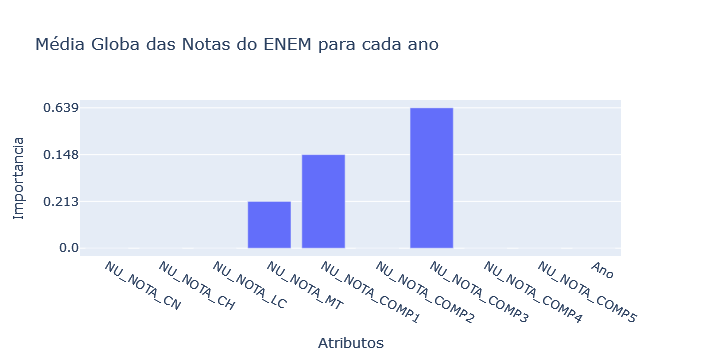

In [266]:
at = []
at = dff_Enem[2019].drop(columns = ['CO_MUNICIPIO_RESIDENCIA'], axis = 1)
at = at.columns.values
at = list(at)
at.append('Ano')
for i in range(0,len(imp)):   
    imp[i] = round(imp[i],3)

               
dd = pd.DataFrame(np.array([at, imp]).T, columns = ['Atributos', 'Importancia'])


fig = px.bar(dd, x = 'Atributos', y = 'Importancia', 
             title = 'Média Globa das Notas do ENEM para cada ano')
fig.show()

fig.write_image("importa.jpeg")
#plt.plot(ano_enem, q_provas)
#plt.title("Quatidade de alunos que realização a prova em cada ano")
#plt.xlabel('Ano')
#plt.ylabel('Quatidade de aluno que fizeram a prova')
#plt.savefig('PrecisaoSensibilidade.jpg')
#plt.show()

In [264]:
[imp[i] for i in range(0,len(at))]

[0.0,
 0.0,
 0.0,
 0.21296943266271132,
 0.14840608747014325,
 0.0,
 0.6386244798671453,
 0.0,
 0.0,
 0.0]

In [238]:
np.array([at, imp])

array([['OB_NT_C1', 'OB_NT_C2', 'OB_NT_C3', 'OB_NT_C4', 'RD_NT_C1',
        'RD_NT_C2', 'RD_NT_C3', 'RD_NT_C4', 'RD_NT_C5', 'ANO'],
       [0.0, 0.0, 0.0, 0.21296943266271132, 0.14840608747014325, 0.0,
        0.6386244798671453, 0.0, 0.0, 0.0]], dtype=object)

In [239]:
df[0].columns.values

array(['OB_NT_C1', 'OB_NT_C2', 'OB_NT_C3', 'OB_NT_C4', 'RD_NT_C1',
       'RD_NT_C2', 'RD_NT_C3', 'RD_NT_C4', 'RD_NT_C5', 'ANO', 'RAZAO'],
      dtype=object)